In [97]:
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [98]:
def loadAsPandas(dataset):
    df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']], columns= dataset['feature_names'] + ['target'])
    return df

In [99]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [100]:
winedf = loadAsPandas(wine)
winedf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [101]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y)

((178, 13), (178,), {0, 1, 2})

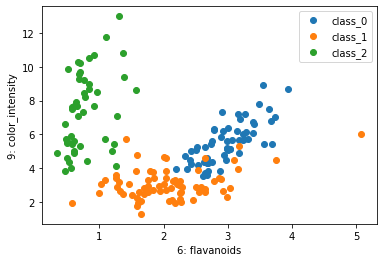

In [102]:
import matplotlib.pyplot as plt
i, j = 6, 9

plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")

for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y==k], "o", label=f"{wine.target_names[k]}")

plt.legend()
plt.show()

In [103]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

In [104]:
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancias(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz
    def predict(self, X):
        ypred = np.empty((X.shape[0]))
        for i in range(X.shape[0]):
            distancias = self.distancias(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
        return ypred
    def train(self, X_train, X_test, y_train, y_test):
        self.fit(X_train, y_train)
        ypred = self.predict(X_test)
        accuracy = accuracy_score(y_teste, ypred)
        return accuracy

In [105]:
modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia

1.0

In [112]:
n_treino = int(len(y)*0.8)
X_treino, X_teste = X[:n_treino], X[n_treino:]
y_treino, y_teste = y[:n_treino], y[n_treino:]
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((142, 13), (36, 13), (142,), (36,))

In [113]:
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

0.2222222222222222

In [128]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

modelo = vizinho()
acuracia = modelo.train(X_treino, X_teste, y_treino, y_teste)
acuracia

0.7796610169491526

<BarContainer object of 13 artists>

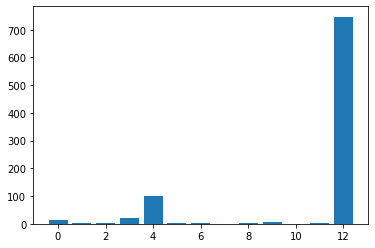

In [115]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))

In [116]:
X.shape

(178, 13)

<BarContainer object of 13 artists>

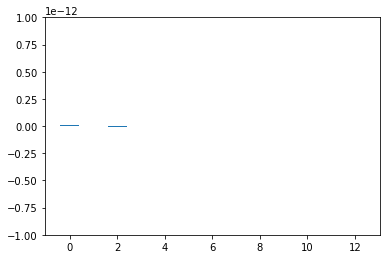

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

plt.bar(list(range(X.shape[1])), np.mean(X_new, axis=0))

In [130]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)

sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

Sem padronização: 0.9555555555555555


In [131]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

Com padronização: 0.9888888888888889


In [134]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("padronizacao", StandardScaler()),
    ("classificador", LogisticRegression())
])

scores = cross_validate(modelo, X, y)
aninha = np.mean(scores['test_score'])
print(f"Aninhado: {aninha}")

Aninhado: 0.9831746031746033


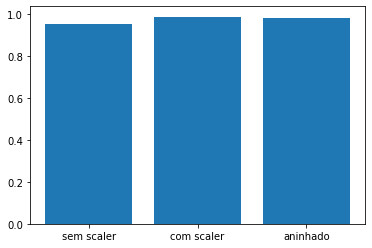

In [135]:
colunas = ['sem scaler', 'com scaler', 'aninhado']
plt.bar(colunas, [sempad, compad, aninha])
plt.show()

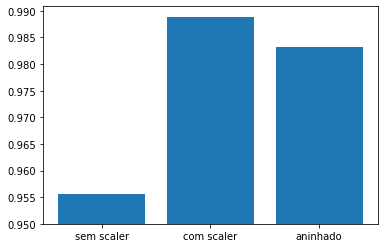

In [137]:
colunas = ['sem scaler', 'com scaler', 'aninhado']
plt.bar(colunas, np.array([sempad, compad, aninha])-0.95, bottom=0.95)
plt.show()